# *Introduction*

Anggota Kelompok:</br>
1301204376	KHALILULLAH AL FAATH</br>
1301204378	BERLIAN MUHAMMAD GALIN AL AWIENOOR

Deskripsi Tugas:
* *Dataset* yang digunakan dalam tugas besar adalah *dataset Breast Cancer Wisconsin* (*Diagnostic*).
* Setiap kelompok harus menyelesaikan sebuah *task* terhadap *dataset* tersebut dengan menerapkan *Automated Machine Learning*.
* *Machine Learning Automation Tools* yang boleh digunakan adalah TPOT, Google, atau Microsoft.
* Bahasa pemrograman yang digunakan adalah Python. 
* Untuk *task* tersebut, mahasiswa diharapkan setidaknya melakukan hal-hal berikut:
  * Formulasi Masalah: mengacu pada 4 tahap *From Problem to ML Solution*.
  * Eksplorasi dan Persiapan Data (termasuk *split* data): Setidaknya menggunakan dua buah teknik eksplorasi dan/atau penyiapan data. Jelaskan mengapa menggunakan teknik tersebut. 
  * Pemodelan: Pilih salah satu dari tiga M*achine Learning Automation Tools* yang akan digunakan. Jelaskan alasan pemilihan tersebut. Lalu, jelaskan dengan detail setiap langkahnya.
  * Eksperimen: Wajib melakukan setidaknya sebuah eksperimen dengan menggunakan salah satu *tools* yang tersedia. 
  * Evaluasi: Pilih metode evaluasi yang ingin digunakan serta jelaskan alasannya. Lakukan evaluasi terhadap model yang digunakan. Berikan analisis terhadap hasil evaluasi.
  * Kesimpulan: Sampaikan kesimpulan dari semua proses yang dijalankan, apa saja *lesson learned*, dan apa saran untuk *improvement* ke depan. 


*Link dataset* dan *repository*: </br>
https://github.com/khalilullahalfaath/AML_Tubes

# *Imports*

In [ ]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=56a6b688116015550067d97684cfa0a921b0476f1fdfa9d3405cab5724870bab
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
!pip install --upgrade tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy.stats import skew
from sklearn.impute import SimpleImputer 
from sklearn import preprocessing

from tpot import  TPOTClassifier
from sklearn.model_selection import train_test_split
from __future__ import print_function
import sys,tempfile, urllib, os

# Formulasi Masalah

Deteksi *Breast Cancer Wisconsin* dengan kolom target Diagnosis, di mana M adalah *malignant* dan B adalah *benignment*. Sebelum menggunakan autoML, akan dilakukan beberapa *preprocessing* terlebih dahulu, seperti:
  * *Handling missing value*
  * *Feature scaling*
  * *Encoding* kolom target
  * Reduksi dimensi
  * Pemisahan *dataset*
  * Penanganan *imbalanced data* </br>

AutoML yang akan digunakan adalah TPOT. TPOT (*Tree-based Pipeline Optimization Tool*) adalah sebuah alat atau *library* dalam *machine learning* yang memungkinkan otomatisasi dalam pemilihan dan penyetelan *pipeline* atau rangkaian algoritma *machine learning* yang optimal untuk suatu tugas tertentu. TPOT menggunakan algoritma pemrograman genetik untuk mencari pipeline terbaik berdasarkan data yang diberikan.

# *Dataset*

In [ ]:
df_train = pd.read_csv("https://github.com/khalilullahalfaath/AML_Tubes/blob/100c9ffa4570823940fb4630217bd87ce45635cb/train.csv?raw=true")

In [ ]:
df_train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.1471,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.186,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.1279,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.1052,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198,0.1043,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4,0.1625,0.2364,0.07678


## *Labeling*

Memberikan label pada kolom yang akan diprediksi

In [ ]:
df_train['diagnosis'].unique()

array(['M', 'B'], dtype=object)

Terdapat dua label yang akan diprediksi, yaitu M dan B, di mana M adalah *malignant* (tumor ganas) dan B adalah *benigment* (tumor jinak)

# *Preprocessing*

Berikut adalah beberapa *preprocessing* yang akan dilakukan
* *Drop* kolom yang tidak dibutuhkan
* *Handling missing value*
* *Feature scaling*
* *Encoding* kolom target
* Reduksi dimensi
* Pemisahan *dataset*
* Penanganan *imbalanced data*

## EDA (*Exploratory Data Analysis*)

Proses awal untuk mengidentifikasi pola, menemukan anomali, dan memeriksa asumsi. Selain itu membantu dalam mendeteksi kesalahan dari awal, dapat mengidentifikasi *outlier*, mengetahui hubungan antar data serta dapat menggali faktor-faktor penting dari data.

In [ ]:
df_train.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
count,4.630000e+02,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,...,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,3.072130e+07,236.667337,19.515745,92.786393,666.295032,0.096341,0.104633,0.182116,0.062562,0.415091,...,0.020868,0.003789,16.472354,25.579503,108.584384,903.777538,0.132454,0.256777,0.293355,0.083819
std,1.248655e+08,4224.020741,8.978351,24.392039,356.167006,0.013692,0.053844,0.028023,0.006973,0.287562,...,0.008671,0.002753,4.900876,6.145821,34.002042,583.850860,0.022941,0.161901,0.064266,0.018354
min,8.670000e+03,8.196000,9.710000,43.790000,143.500000,0.062510,0.019380,0.116700,0.049960,0.111500,...,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.156500,0.055040
25%,8.652800e+05,11.800000,16.070000,75.485000,427.950000,0.086580,0.064130,0.162100,0.057585,0.235850,...,0.015170,0.002201,13.060000,20.940000,84.480000,519.300000,0.116600,0.144950,0.252600,0.071250
50%,8.978800e+05,13.480000,18.770000,86.910000,559.200000,0.096100,0.092180,0.180000,0.061300,0.330500,...,0.018840,0.003118,15.030000,25.260000,98.270000,698.700000,0.131400,0.211900,0.284100,0.079930
75%,8.910720e+06,16.150000,21.680000,106.450000,804.100000,0.105350,0.130550,0.196500,0.065815,0.503800,...,0.023765,0.004484,19.515000,29.615000,128.900000,1170.000000,0.146350,0.343700,0.320400,0.092095
max,9.112962e+08,90000.000000,190.000000,188.500000,2501.000000,0.144700,0.345400,0.304000,0.097440,2.873000,...,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,0.663800,0.207500


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       463 non-null    int64  
 1   diagnosis                463 non-null    object 
 2   radius_mean              463 non-null    float64
 3   texture_mean             463 non-null    float64
 4   perimeter_mean           463 non-null    float64
 5   area_mean                463 non-null    float64
 6   smoothness_mean          463 non-null    float64
 7   compactness_mean         463 non-null    float64
 8   concavity_mean           463 non-null    object 
 9   concave points_mean      463 non-null    object 
 10  symmetry_mean            463 non-null    float64
 11  fractal_dimension_mean   463 non-null    float64
 12  radius_se                463 non-null    float64
 13  texture_se               463 non-null    float64
 14  perimeter_se             4

## *Drop* Kolom yang Tidak Dibutuhkan

In [ ]:
df_train.drop("id",axis=1, inplace=True)

## *Handling Missing Value*

In [ ]:
def count_missing_value(df):
  df.replace("?",np.nan, inplace=True)
  nanColumn = {}
  columns = df.columns
  for i in columns:
    nanCount = df[i].isna().sum()
    # print(i,nanCount)
    if (nanCount):
      nanColumn[i] = nanCount
  return nanColumn

nanValue = count_missing_value(df_train)

In [ ]:
print(nanValue)

{'concavity_mean': 7, 'concave points_mean': 7, 'concavity_se': 7, 'concave points_se': 7, 'concavity_worst': 7, 'concave points_worst': 7}


In [ ]:
pd.DataFrame(nanValue,index=[0]).transpose()

,0
concavity_mean,7
concave points_mean,7
concavity_se,7
concave points_se,7
concavity_worst,7
concave points_worst,7


Untuk proses *handling*, kita akan meng*impute* dengan nilai *mean* (rata-rata) atau *median* (nilai tengah). Oleh karena itu, akan dicek *skewness data* terlebih dahulu

In [ ]:
copy = df_train.copy()
copy.drop("diagnosis", axis=1, inplace=True)
copy.dropna(inplace=True)

In [ ]:
copy.shape

(456, 30)

In [ ]:
for i in nanValue:
  data = copy[i].astype(float)
  print(f"skewness {i}: {skew(data)}")

skewness concavity_mean: 1.3597537203443542
skewness concave points_mean: 1.1420450269265483
skewness concavity_se: 5.269678107139469
skewness concave points_se: 1.7685931231661518
skewness concavity_worst: 1.0521335401336196
skewness concave points_worst: 0.4925786714977178


Dilihat *output* diatas, karena semua datanya menceng ke kanan maka kita akan mengisi data yang *null* dengan *median*. Sebagaimana yang dijelaskan di sini https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/

In [ ]:
nanValue = list(nanValue.keys())

imputer = SimpleImputer(strategy = 'median', missing_values = np.nan)
imputer.fit(df_train[nanValue])
df_train[nanValue] = imputer.transform(df_train[nanValue])

In [ ]:
df_train.shape

(463, 31)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                463 non-null    object 
 1   radius_mean              463 non-null    float64
 2   texture_mean             463 non-null    float64
 3   perimeter_mean           463 non-null    float64
 4   area_mean                463 non-null    float64
 5   smoothness_mean          463 non-null    float64
 6   compactness_mean         463 non-null    float64
 7   concavity_mean           463 non-null    float64
 8   concave points_mean      463 non-null    float64
 9   symmetry_mean            463 non-null    float64
 10  fractal_dimension_mean   463 non-null    float64
 11  radius_se                463 non-null    float64
 12  texture_se               463 non-null    float64
 13  perimeter_se             463 non-null    float64
 14  area_se                  4

## *Encoding* Kolom Target

*Encoding* kolom target (*target column*) adalah proses mengubah nilai-nilai dalam kolom target menjadi bentuk yang dapat digunakan, dalam hal ini *integer* sehingga terjadi konsistensi data dan dapat digunakan nantinya untuk EDA.

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(df_train['diagnosis'])
df_train['diagnosis'] = le.transform(df_train['diagnosis'])

In [ ]:
df_train.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


## *Duplicated Data*

In [ ]:
bool_series = df_train.duplicated()
print(bool_series)

0      False
1      False
2      False
3      False
4      False
       ...  
458    False
459    False
460    False
461    False
462    False
Length: 463, dtype: bool


In [ ]:
print(type(bool_series))
bool_series.value_counts()

<class 'pandas.core.series.Series'>


False    463
dtype: int64

## Menghapus Kolom yang Tidak Berkorelasi dengan *Feature* Lain

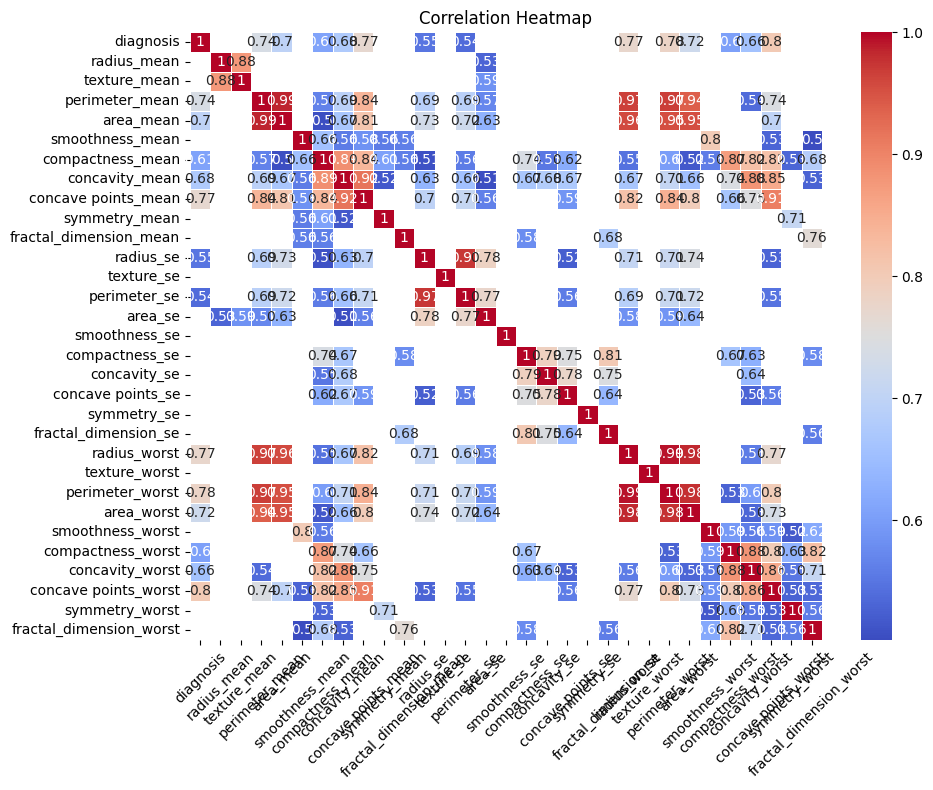

Columns with no or very low correlation to other features: ['texture_se', 'smoothness_se', 'symmetry_se', 'texture_worst']


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def create_correlation_heatmap(df, threshold=0.5):
    correlation_matrix = df.corr()

    # Filter correlation matrix based on threshold
    correlation_matrix = correlation_matrix[
        (correlation_matrix >= threshold) | (correlation_matrix <= -threshold)
    ]

    no_correlation_cols = []
    for col in correlation_matrix.columns:
        if correlation_matrix[col].nunique() == 1:
            no_correlation_cols.append(col)

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(10, 8))

    # Create heatmap using seaborn
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax)

    # Customize the plot
    ax.set_title('Correlation Heatmap')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()

    # Display the plot
    plt.show()

    # Return column names with no correlation to other features
    return no_correlation_cols

# Example usage with a threshold of 0.5 (can be adjusted as desired)
no_correlation_columns = create_correlation_heatmap(df_train, threshold=0.5)
print("Columns with no or very low correlation to other features:", no_correlation_columns)

In [ ]:
df_train.drop(no_correlation_columns, axis=1, inplace=True)

## *Split Dataset*

In [ ]:
target = df_train["diagnosis"]
df_train.drop("diagnosis", axis=1, inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train, target, train_size=0.75, test_size=0.25)

In [ ]:
X_train.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,fractal_dimension_se,radius_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
225,14.34,13.47,92.51,641.2,0.09906,0.07624,0.05724,0.04603,0.2075,0.05448,...,0.001463,16.77,110.40,873.2,0.1297,0.15250,0.16320,0.10870,0.3062,0.06072
60,10.17,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,0.005953,11.02,69.86,368.6,0.1275,0.09866,0.02168,0.02579,0.3557,0.08020
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,0.002373,19.47,129.70,1175.0,0.1395,0.30550,0.29920,0.13120,0.3480,0.07619


In [ ]:
X_test.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,fractal_dimension_se,radius_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
356,13.05,18.59,85.09,512.0,0.10820,0.13040,0.09603,0.05603,0.2035,0.06501,...,0.005715,14.19,94.22,591.2,0.1343,0.2658,0.2573,0.1258,0.3113,0.08317
269,10.71,20.39,69.50,344.9,0.10820,0.12890,0.08448,0.02867,0.1668,0.06862,...,0.007610,11.69,76.51,410.4,0.1335,0.2550,0.2534,0.0860,0.2605,0.08701
19,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,0.002300,15.11,99.70,711.2,0.1440,0.1773,0.2390,0.1288,0.2977,0.07259


In [ ]:
y_train.head(3)

225    0
60     0
132    1
Name: diagnosis, dtype: int64

In [ ]:
y_test.head(3)

356    0
269    0
19     0
Name: diagnosis, dtype: int64

# *Modeling* (Pemodelan)

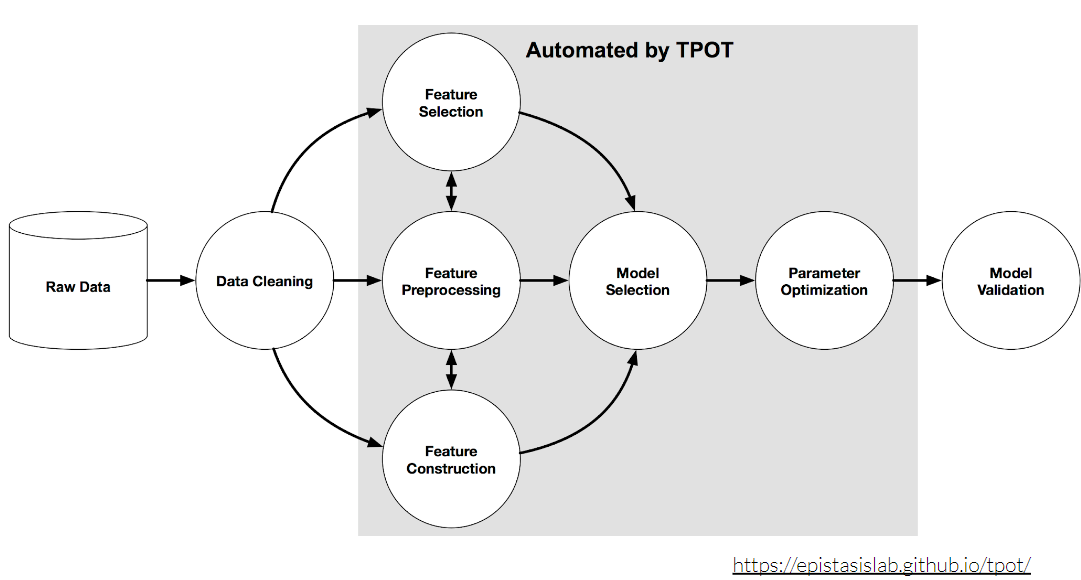

In [ ]:
import time
import datetime

In [ ]:
import multiprocessing

start = time.time()
if __name__ == '__main__':
    multiprocessing.set_start_method('forkserver', force=True)
    tpot_model =  TPOTClassifier(generations=10, population_size=50, verbosity=2,n_jobs = 20, random_state=50, early_stop=3)
    tpot_model.fit(X_train, y_train)
end = time.time()

Optimization Progress:   0%|          | 0/550 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9740786749482402

Generation 2 - Current best internal CV score: 0.9740786749482402

Generation 3 - Current best internal CV score: 0.976935817805383

Generation 4 - Current best internal CV score: 0.976935817805383

Generation 5 - Current best internal CV score: 0.9855900621118012

Generation 6 - Current best internal CV score: 0.9855900621118012

Generation 7 - Current best internal CV score: 0.9855900621118012

Generation 8 - Current best internal CV score: 0.9855900621118012

The optimized pipeline was not improved after evaluating 3 more generations. Will end the optimization process.

TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingClassifier(KNeighborsClassifier(input_matrix, n_neighbors=12, p=2, weights=uniform), learning_rate=0.1, max_depth=1, max_features=0.7500000000000001, min_samples_leaf=19, min_samples_split=8, n_estimators=100, subsample=0.7500000000000001)


In [ ]:
# Convert the elapsed time to a timedelta object
elapsed_time = end - start
delta = datetime.timedelta(seconds=elapsed_time)

# Format the timedelta as "hour:minute:second"
elapsed_time_formatted = str(delta)

print("Elapsed time:", elapsed_time_formatted)

Elapsed time: 0:10:29.380151


In [ ]:
print(tpot_model.score(X_test, y_test))

0.9741379310344828


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
tpot_model.export('tpot_default_pipeline.py')

In [ ]:
!cat tpot_default_pipeline.py

import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=50)

# Average CV score on the training set was: 0.9855900621118012
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=KNeighborsClassifier(n_neighbors=12, p=2, weights="uniform")),
    GradientBoostingClassifier(learning_rate=0.1, max_depth=1, max_features=0.7500000000000001, m

In [ ]:
tpot_model.evaluated_individuals_

{'ExtraTreesClassifier(input_matrix, ExtraTreesClassifier__bootstrap=False, ExtraTreesClassifier__criterion=entropy, ExtraTreesClassifier__max_features=0.1, ExtraTreesClassifier__min_samples_leaf=5, ExtraTreesClassifier__min_samples_split=8, ExtraTreesClassifier__n_estimators=100)': {'generation': 0,
  'mutation_count': 0,
  'crossover_count': 0,
  'predecessor': ('ROOT',),
  'operator_count': 1,
  'internal_cv_score': 0.9453002070393375},
 'XGBClassifier(input_matrix, XGBClassifier__learning_rate=0.5, XGBClassifier__max_depth=4, XGBClassifier__min_child_weight=7, XGBClassifier__n_estimators=100, XGBClassifier__n_jobs=1, XGBClassifier__subsample=0.9500000000000001, XGBClassifier__verbosity=0)': {'generation': 0,
  'mutation_count': 0,
  'crossover_count': 0,
  'predecessor': ('ROOT',),
  'operator_count': 1,
  'internal_cv_score': 0.9567287784679088},
 'KNeighborsClassifier(input_matrix, KNeighborsClassifier__n_neighbors=29, KNeighborsClassifier__p=2, KNeighborsClassifier__weights=unif

In [ ]:
tpot_model.fitted_pipeline_

Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=KNeighborsClassifier(n_neighbors=12))),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=1,
                                            max_features=0.7500000000000001,
                                            min_samples_leaf=19,
                                            min_samples_split=8,
                                            random_state=50,
                                            subsample=0.7500000000000001))])

# *Experiment*

Batasan Waktu: TPOT dapat memakan waktu yang signifikan untuk menjelajahi berbagai *pipeline* dan *hyperparameter*. Bereksperimen dengan menetapkan batasan waktu untuk membatasi ruang pencarian dan mengamati kompromi antara kinerja model dan waktu pelatihan.

Dari dokumentasi TPOT:
"*TPOT comes with a handful of default operators and parameter configurations that we believe work well for optimizing machine learning pipelines. Below is a list of the current built-in configurations that come with TPOT*."

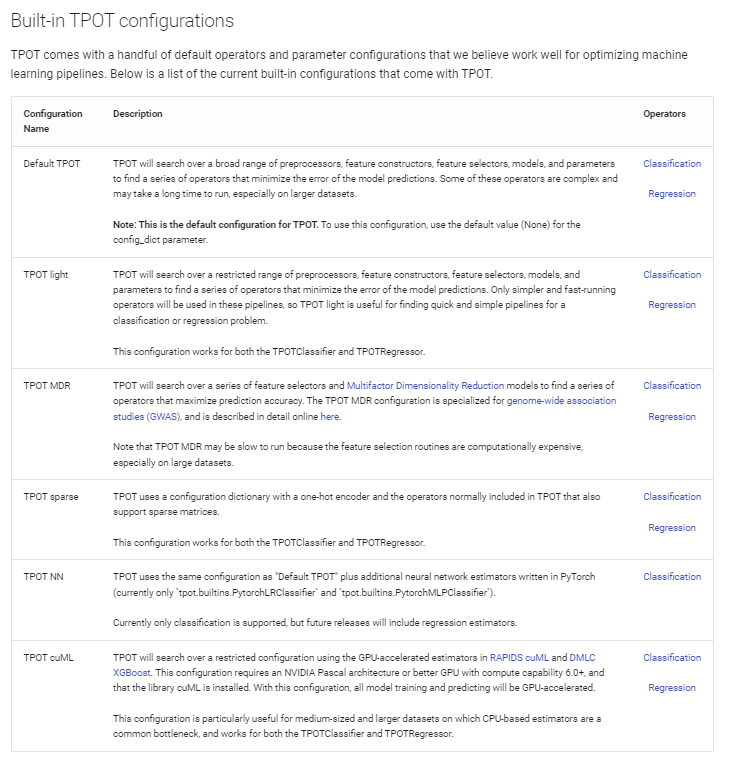

## *TPOT Light*

Model TPOT yang menyederhanakan kompleksitas penyesuaian model, memiliki konfigurasi yang lebih sederhana dan terbatas, namun tetap menyediakan otomatisasi dalam penyetelan model.

In [ ]:
start = time.time()
if __name__ == '__main__':
    multiprocessing.set_start_method('forkserver', force=True)
    tpot_light = TPOTClassifier(generations=10, population_size=50, verbosity=2, random_state=50, early_stop=3, config_dict='TPOT light')
    tpot_light.fit(X_train, y_train)
end = time.time()

Optimization Progress:   0%|          | 0/550 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9539958592132505

Generation 2 - Current best internal CV score: 0.9539958592132505

Generation 3 - Current best internal CV score: 0.9654244306418219

Generation 4 - Current best internal CV score: 0.9654658385093168

Generation 5 - Current best internal CV score: 0.9740372670807453

Generation 6 - Current best internal CV score: 0.9740786749482402

Generation 7 - Current best internal CV score: 0.9740786749482402

Generation 8 - Current best internal CV score: 0.9740786749482402

Generation 9 - Current best internal CV score: 0.9768944099378881

Generation 10 - Current best internal CV score: 0.9768944099378881

Best pipeline: LogisticRegression(KNeighborsClassifier(RobustScaler(ZeroCount(input_matrix)), n_neighbors=50, p=2, weights=uniform), C=25.0, dual=False, penalty=l2)


In [ ]:
# Convert the elapsed time to a timedelta object
elapsed_time = end - start
delta = datetime.timedelta(seconds=elapsed_time)

# Format the timedelta as "hour:minute:second"
elapsed_time_formatted = str(delta)

print("Elapsed time:", elapsed_time_formatted)

Elapsed time: 0:00:57.911414


In [ ]:
print(tpot_light.score(X_test, y_test))

0.9741379310344828


In [ ]:
tpot_light.fitted_pipeline_

Pipeline(steps=[('zerocount', ZeroCount()), ('robustscaler', RobustScaler()),
                ('stackingestimator',
                 StackingEstimator(estimator=KNeighborsClassifier(n_neighbors=50))),
                ('logisticregression',
                 LogisticRegression(C=25.0, random_state=50))])

## *Limit Time TPOT*

Model TPOT yang memiliki batasan waktu maksimum untuk penyesuaian model, memungkinkan untuk menjalankan proses TPOT dengan waktu terbatas dan dapat mengontrol durasi eksekusi.

In [ ]:
MAX_EVAL_MINS = 1
MAX_TIME_MINS = 1
start = time.time()
if __name__ == '__main__':
    multiprocessing.set_start_method('forkserver', force=True)
    tpot_limited =  TPOTClassifier(generations=10, population_size=50, verbosity=2,n_jobs = 20, random_state=50, early_stop=3, max_time_mins=MAX_TIME_MINS)
    tpot_limited.fit(X_train, y_train)
end = time.time()

Optimization Progress:   0%|          | 0/50 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9740786749482402

1.12 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingClassifier(LogisticRegression(input_matrix, C=20.0, dual=False, penalty=l2), learning_rate=0.5, max_depth=1, max_features=0.15000000000000002, min_samples_leaf=15, min_samples_split=12, n_estimators=100, subsample=0.45)


In [ ]:
# Convert the elapsed time to a timedelta object
elapsed_time = end - start
delta = datetime.timedelta(seconds=elapsed_time)

# Format the timedelta as "hour:minute:second"
elapsed_time_formatted = str(delta)

print("Elapsed time:", elapsed_time_formatted)

Elapsed time: 0:01:07.458729


In [ ]:
print(tpot_limited.score(X_test, y_test))

0.9741379310344828


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
tpot_limited.fitted_pipeline_

Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=LogisticRegression(C=20.0,
                                                                random_state=50))),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.5, max_depth=1,
                                            max_features=0.15000000000000002,
                                            min_samples_leaf=15,
                                            min_samples_split=12,
                                            random_state=50, subsample=0.45))])

## *TPOT with Handled Outlier*

Model TPOT yang telah diaplikasikan pada *dataset* yang telah ditangani *outlier*-nya menggunakan metode IQR.

In [ ]:
columns = list(df_train.columns)

In [ ]:
print(columns)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'fractal_dimension_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


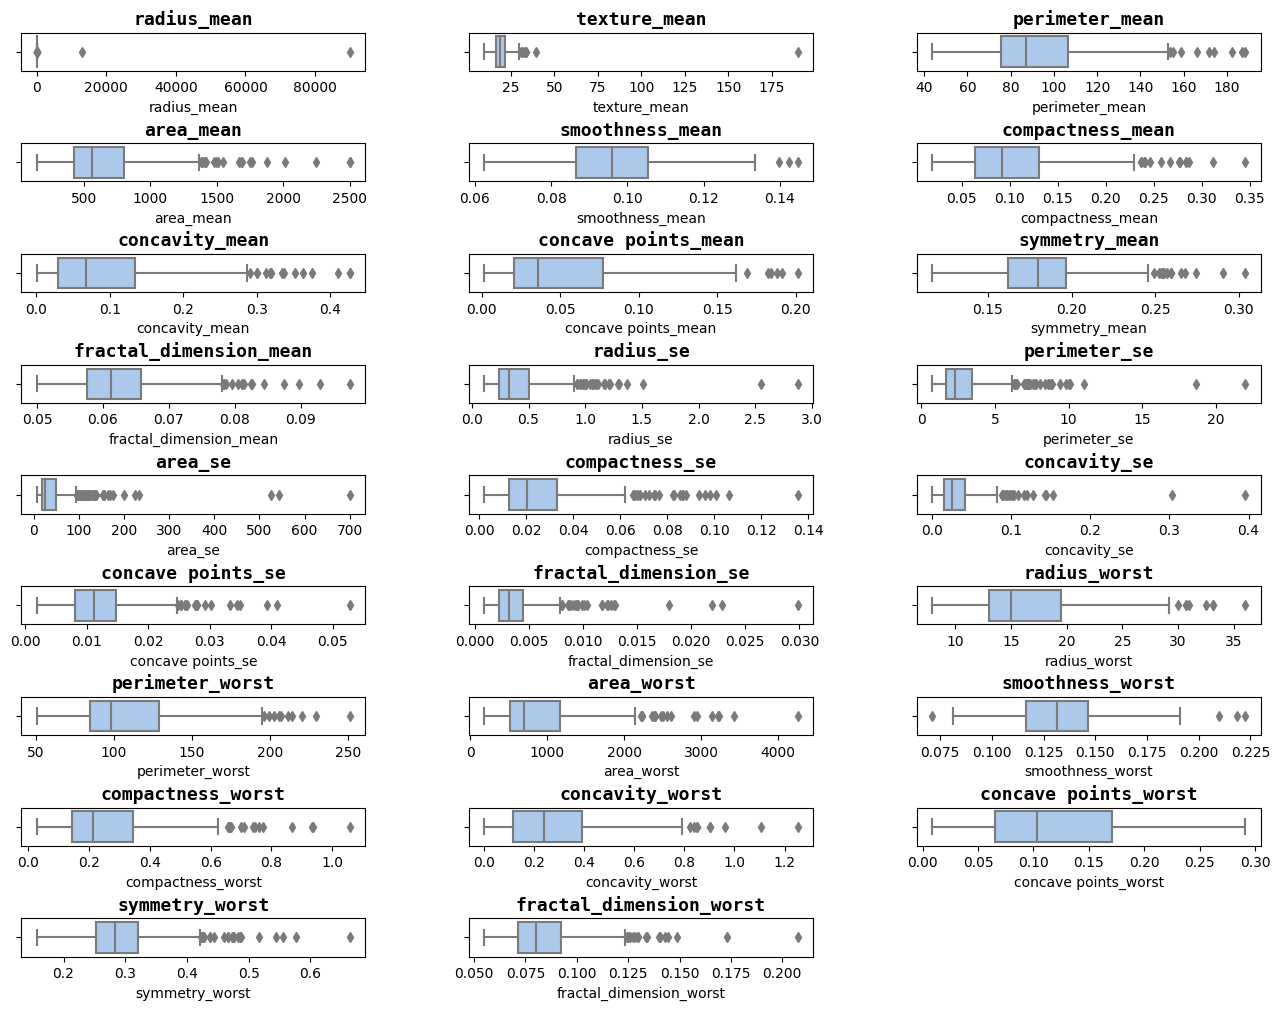

In [ ]:
import math

num_columns = 3  
num_rows = math.ceil(len(columns) / num_columns)  

fig, ax = plt.subplots(num_rows, num_columns, figsize=(16, 12))  

for i, col in enumerate(columns):
    plt.subplots_adjust(hspace=1.9, wspace=0.3)  
    row_idx = i // num_columns  
    col_idx = i % num_columns  

    g = sns.boxplot(data=df_train, x=col, ax=ax[row_idx, col_idx], palette="pastel")
    g.set_title(col, weight="bold", fontsize=13, fontname="monospace")

if len(columns) % num_columns != 0:
    last_row_idx = math.ceil(len(columns) / num_columns) - 1
    for j in range(len(columns) % num_columns, num_columns):
        ax[last_row_idx, j].axis('off')

plt.show()

Dari *output* diatas, dapat dilihat bahwa terdapat beberapa nilai *outlier*, di sini kita akan *handling* dengan *method IQR*

In [ ]:
def find_outliers_iqr(df):
    columns = list(df.columns)
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filt = ((df[columns] < lower_bound) | (df[columns] > upper_bound))
    outlier_count = filt.sum()

    return outlier_count

In [ ]:
print(find_outliers_iqr(df_train))

radius_mean                12
texture_mean                7
perimeter_mean              9
area_mean                  19
smoothness_mean             3
compactness_mean           14
concavity_mean             15
concave points_mean         6
symmetry_mean              14
fractal_dimension_mean     15
radius_se                  29
perimeter_se               31
area_se                    44
compactness_se             22
concavity_se               20
concave points_se          18
fractal_dimension_se       23
radius_worst                8
perimeter_worst            10
area_worst                 18
smoothness_worst            4
compactness_worst          14
concavity_worst             9
concave points_worst        0
symmetry_worst             21
fractal_dimension_worst    18
dtype: int64


In [ ]:
def outlier_handling_with_IQR(df):
  columns = list(df.columns)
  for i in columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)

    IQR = Q3 - Q1

    LB = Q1 - (IQR * 1.5)
    UB = Q3 + (IQR * 1.5)

    df.loc[df[i] > UB, i] = UB
    df.loc[df[i] < LB, i] = LB
  return df

In [ ]:
handled_outlier_df = outlier_handling_with_IQR(df_train.copy())

In [ ]:
handled_outlier_df.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,fractal_dimension_se,radius_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.23018,0.290105,0.14710,0.2419,0.07816,...,0.006193,25.38,184.6,2019.0,0.1622,0.641825,0.7119,0.2654,0.4221,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.086900,0.07017,0.1812,0.05667,...,0.003532,24.99,158.8,1956.0,0.1238,0.186600,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.197400,0.12790,0.2069,0.05999,...,0.004571,23.57,152.5,1709.0,0.1444,0.424500,0.4504,0.2430,0.3613,0.08758


In [ ]:
print(find_outliers_iqr(handled_outlier_df))

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
perimeter_se               0
area_se                    0
compactness_se             0
concavity_se               0
concave points_se          0
fractal_dimension_se       0
radius_worst               0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(handled_outlier_df, target, train_size=0.75, test_size=0.25)

In [ ]:
start = time.time()
if __name__ == '__main__':
    multiprocessing.set_start_method('forkserver', force=True)
    tpot_handled =  TPOTClassifier(generations=10, population_size=50, verbosity=2,n_jobs = 20, random_state=50, early_stop=3)
    tpot_handled.fit(X_train, y_train)
end = time.time()

Optimization Progress:   0%|          | 0/550 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9826915113871635

Generation 2 - Current best internal CV score: 0.9826915113871635

Generation 3 - Current best internal CV score: 0.9826915113871635

Generation 4 - Current best internal CV score: 0.9826915113871635

Generation 5 - Current best internal CV score: 0.9826915113871635

Generation 6 - Current best internal CV score: 0.9826915113871635

Generation 7 - Current best internal CV score: 0.9826915113871635

The optimized pipeline was not improved after evaluating 3 more generations. Will end the optimization process.

TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: LogisticRegression(RobustScaler(GradientBoostingClassifier(input_matrix, learning_rate=0.01, max_depth=1, max_features=0.05, min_samples_leaf=12, min_samples_split=3, n_estimators=100, subsample=1.0)), C=1.0, dual=False, penalty=l2)


In [ ]:
# Convert the elapsed time to a timedelta object
elapsed_time = end - start
delta = datetime.timedelta(seconds=elapsed_time)

# Format the timedelta as "hour:minute:second"
elapsed_time_formatted = str(delta)

print("Elapsed time:", elapsed_time_formatted)

Elapsed time: 0:10:07.510398


In [ ]:
print(tpot_handled.score(X_test, y_test))

0.9655172413793104


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
tpot_handled.fitted_pipeline_

Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                                        max_depth=1,
                                                                        max_features=0.05,
                                                                        min_samples_leaf=12,
                                                                        min_samples_split=3,
                                                                        random_state=50))),
                ('robustscaler', RobustScaler()),
                ('logisticregression', LogisticRegression(random_state=50))])

## *Best Model*

Berdasarkan evaluasi dengan perhitungan akurasi, berikut adalah model-model yang ada perlakuan yang ada padanya

In [ ]:
print(tpot_model.score(X_test, y_test))
print(tpot_light.score(X_test, y_test))
print(tpot_limited.score(X_test, y_test))
print(tpot_handled.score(X_test, y_test))

0.9913793103448276


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9741379310344828
0.9913793103448276
0.9655172413793104


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


# *Predicted Data*

In [ ]:
test_data = pd.read_csv("https://github.com/khalilullahalfaath/AML_Tubes/blob/main/test.csv?raw=true")

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       106 non-null    int64  
 1   radius_mean              106 non-null    float64
 2   texture_mean             106 non-null    float64
 3   perimeter_mean           106 non-null    float64
 4   area_mean                106 non-null    float64
 5   smoothness_mean          106 non-null    float64
 6   compactness_mean         106 non-null    float64
 7   concavity_mean           106 non-null    float64
 8   concave points_mean      106 non-null    float64
 9   symmetry_mean            106 non-null    float64
 10  fractal_dimension_mean   106 non-null    float64
 11  radius_se                106 non-null    float64
 12  texture_se               106 non-null    float64
 13  perimeter_se             106 non-null    float64
 14  area_se                  1

# Evaluasi Performansi

Menghitung evaluasi performansi dengan menggunakan *Confussion Matrix*

In [ ]:
from sklearn.metrics import classification_report

# prediksi label
y_pred_model = tpot_model.predict(X_test)
y_pred_light = tpot_light.predict(X_test)
y_pred_limited = tpot_limited.predict(X_test)
y_pred_handled = tpot_handled.predict(X_test)

# classification report dari model
report_model = classification_report(y_test, y_pred_model)
report_light = classification_report(y_test, y_pred_light)
report_limited = classification_report(y_test, y_pred_limited)
report_handled = classification_report(y_test, y_pred_handled)

print("TPOT Model")
print(report_model)
print("=====================================================")

print("TPOT Light")
print(report_light)
print("=====================================================")

print("Limited Time TPOT")
print(report_limited)
print("=====================================================")

print("TPOT with Handled Outlier")
print(report_handled)
print("=====================================================")

TPOT Model
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        44

    accuracy                           0.99       116
   macro avg       0.99      0.99      0.99       116
weighted avg       0.99      0.99      0.99       116

TPOT Light
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.97        44

    accuracy                           0.97       116
   macro avg       0.97      0.97      0.97       116
weighted avg       0.97      0.97      0.97       116

Limited Time TPOT
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        44

    accuracy                           0.99       116
   macro avg       0.99      0.99      0.99       116
weighted avg       0.99      0.99 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does no

# Implementasi Hasil Prediksi

Mengimplementasikan hasil prediksi dengan menambahkan kolom Diagnosis pada *dataset* dan meng*export*nya

In [ ]:
# label prediksi
y_pred = tpot_handled.predict(handled_outlier_df)

# dataframe untuk diagnosis
df_predicted = handled_outlier_df.copy()
df_predicted['Diagnosis'] = y_pred
diagnosis_str = {1 : 'M', 0 : 'B'}
df_predicted['Diagnosis'] = df_predicted['Diagnosis'].map(diagnosis_str)

# export ke csv
df_predicted.to_csv('predicted.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
df_predicted

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Diagnosis
0,17.990,10.38,122.8000,1001.000,0.118400,0.23018,0.290105,0.147100,0.2419,0.07816,...,25.3800,184.60,2019.00,0.162200,0.641825,0.71190,0.26540,0.4221,0.118900,M
1,20.570,17.77,132.9000,1326.000,0.084740,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.9900,158.80,1956.00,0.123800,0.186600,0.24160,0.18600,0.2750,0.089020,M
2,19.690,21.25,130.0000,1203.000,0.109600,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.5700,152.50,1709.00,0.144400,0.424500,0.45040,0.24300,0.3613,0.087580,M
3,11.420,20.38,77.5800,386.100,0.133505,0.23018,0.241400,0.105200,0.2481,0.07816,...,14.9100,98.87,567.70,0.190975,0.641825,0.68690,0.25750,0.4221,0.123362,M
4,20.290,14.34,135.1000,1297.000,0.100300,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.5400,152.20,1575.00,0.137400,0.205000,0.40000,0.16250,0.2364,0.076780,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,13.000,25.13,82.6100,520.200,0.083690,0.05073,0.012060,0.017620,0.1667,0.05449,...,14.3400,91.06,628.50,0.121800,0.109300,0.04462,0.05921,0.2306,0.062910,B
459,9.755,28.20,61.6800,290.900,0.079840,0.04626,0.015410,0.010430,0.1621,0.05952,...,10.6700,68.03,349.90,0.111000,0.110900,0.07190,0.04866,0.2321,0.072110,B
460,17.080,27.15,111.2000,930.900,0.098980,0.11100,0.100700,0.064310,0.1793,0.06281,...,22.9600,152.10,1648.00,0.160000,0.244400,0.26390,0.15550,0.3010,0.090600,M
461,22.675,26.27,152.8975,1368.325,0.108400,0.19880,0.290105,0.162087,0.2061,0.05623,...,29.1975,195.53,2146.05,0.135700,0.425600,0.68330,0.26250,0.2641,0.074270,M


In [ ]:
# menghitung jumlah data pada kolom Diagnosis
diagnosis_counts = df_predicted['Diagnosis'].value_counts()

print("Jumlah M (Malignant) :", diagnosis_counts['M'])
print("Jumlah B (Benign)    :", diagnosis_counts['B'])

Jumlah M (Malignant) : 182
Jumlah B (Benign)    : 281
